In [23]:
#!pip install faker

In [24]:
from faker import Faker

In [1]:
import pandas as pd
import numpy as np
import random

In [26]:
fake = Faker()

In [27]:
def calculate_credit_amount(income, dti, collateral_value, old_collateral, credit_score):
    max_dti = 0.4
    max_loan_to_collateral_ratio = 0.8

    if dti <= max_dti and collateral_value >= 0 and credit_score >= 300:
        max_loan_from_income = income * dti
        max_loan_from_collateral = (collateral_value+old_collateral) * max_loan_to_collateral_ratio
        max_loan = min(max_loan_from_income, max_loan_from_collateral)
        max_loan = (max_loan_from_income + max_loan_from_collateral)
        return max_loan
    else:
        return 0


In [28]:
def income(possible_job):
  if(possible_job == 'Pegawai Negeri'):
    income = fake.random_int(min=3000000, max=50000000, step=100000)
  elif(possible_job == 'Pengusaha'):
    income = fake.random_int(min=1000000, max=100000000, step=100000)
  elif(possible_job == 'Professional'):
    income = fake.random_int(min=1000000, max=10000000, step=100000)
  elif(possible_job == 'Pegawai Swasta'):
    income = fake.random_int(min=3000000, max=100000000, step=100000)
  else:
    income = fake.random_int(min=1000000, max=40000000, step=100000)
  return income


In [29]:
def calculate_fee(credit_amount):
  if credit_amount > 0:
    return fake.random_int(min=0, max=1000000, step=10000)
  return 0

In [30]:
def calculate_tenor(age, monthly_income, asset_value, loan_amount, collateral, old_collateral, arrear_amount, old_tenor):
  if loan_amount == 0:
    return 0
  if arrear_amount > 3:
    return old_tenor
  t_colateral = (collateral+old_collateral)/1000000
  if age >= 18 and age <=30:
    t_age = 24
  elif age > 30 and age <= 40:
    t_age = 12
  elif age > 40 and age <= 50:
    t_age = 6
  else:
    t_age = 3
  t_loan = loan_amount/10000000
  t_asset = asset_value/10000000

  t_inc = monthly_income/1000000
  tenor = t_age + t_loan + t_asset + t_inc + t_colateral
  if tenor < 3:
    return 3
  if tenor > 180:
    return 180
  return int(tenor)




In [31]:
def calculate_monthly_payment(tenor, interest_rate, loan_amount):
  if(tenor == 0):
    return 0
  return ((loan_amount+(loan_amount*interest_rate/100))/tenor)

asumsi
tenor min = 3
dan max = 360
selisih = 357




In [32]:
def calculate_interest1(tenor, old_tenor=0):
    if tenor <=3:
        tenor = round(random.uniform(0, 1), 2)
    elif tenor <= 12:
        tenor = round(random.uniform(1, 3), 2)
    elif tenor <= 24:
        tenor = round(random.uniform(3, 6), 2)
    elif tenor <= 36:
        tenor = round(random.uniform(6, 9), 2)
    elif tenor <= 72:
        tenor = round(random.uniform(9, 12), 2)
    else:
        tenor = round(random.uniform(12, 15), 2)
    return tenor

def calculate_interest2(tenor, old_tenor):
    x = tenor - old_tenor
    interest =(x/177)*15
    return interest

calculate_interest2(360, 3)
calculate_interest1(180)

13.83

180, 12 - 15
72, 9% - 12%
36, 6% - 9%%
24, 3% - 6%
12, 1% - 3%
3, 0 - 1%

In [33]:
import random

def generate_payment():
    max_length = 12
    payments = []

    arrear = 0
    for i in range(max_length):
        random_arrear = random.randint(-1, 1)
        arrear = arrear + random_arrear
        if arrear < 0:
            arrear = 0
        payments.append(arrear)

    return payments, max(payments)

# Contoh penggunaan
payments, max_payment = generate_payment()
print(payments)
print('max =', max_payment)

[1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1]
max = 2


In [34]:
def calculate_old_tenor(loan_amount):
    if loan_amount == 0:
        return 0
    return fake.random_int(min=3, max=60, step=3)

In [35]:
def dummy_data():
  possible_job = ['Buruh', 'Pegawai Negeri', 'Pegawai Swasta', 'Professional', 'Pengusaha']
  possible_goals = ['Bisnis', 'Investasi', 'Properti pribadi', 'Lainnya']
  possible_family_health = ['Sehat', 'Tidak sehat']
  #Financial
  #Generate job debtor
  # Generate NIK
  # Generate nomor unik minimal 10 digit 
  occupation = fake.random_element(possible_job)
  #Generate monthly income
  monthly_income = income(occupation)
  #Generate debt each month
  debt = (fake.random_int(min=1000000, max=100000000, step=100000))/12
  #Generate debt to income ratio
  dti = debt/monthly_income
  #Generate monthly expense
  monthly_expenses = fake.random_int(min=1000000, max=monthly_income, step=100000)
  #Generate financial capability
  net_income = monthly_income - monthly_expenses
  #Generate asset value
  asset_value = fake.random_int(min=1000000, max=100000000, step=100000)
  # Generate monthly income_initial_credit
  previous_credit_monthly_income = fake.random_int(min=1000000, max=100000000, step=100000)
  # Generate data financial_changes = []
  financial_changes = monthly_income - previous_credit_monthly_income
  # Generate data business conditions
  business_conditions = fake.random_int(min=-100, max=100)

  #Credit Information
  #debtor_name = fake.name()
  #nik = fake.unique.random_number(digits=10)  
  #Generate data id debtor
  debtor_id = fake.credit_card_number()
  #Generate score credit
  credit_score = fake.random_int(min=300, max=850)
  #Generate amount of credit payments
  amount_of_late_days = fake.random_int(min=0, max=360)
  #Generate credit goals
  credit_goals = fake.random_element(possible_goals)
  # Generate old collateral
  old_collateral = fake.random_int(min=900000, max=asset_value, step=100000)
  #Generate data collateral
  asset_remain = asset_value-old_collateral
  collateral = fake.random_int(min=0, max=asset_remain, step=100000)
  #Generate data age
  age = fake.random_int(min=18, max=65)
  # Generate credit_amount = []
  loan_amount = calculate_credit_amount(monthly_income, dti, collateral,
                                        old_collateral, credit_score)
  # Generate old tenor
  old_tenor = calculate_old_tenor(loan_amount)
  # Generate Arrear AMount
  _, arrear_amount = generate_payment()
  # Generate tenor_in_month = [] ref:https://lifepal.co.id/media/tenor-adalah/
  tenor = calculate_tenor(age, monthly_income, asset_value, loan_amount,collateral, old_collateral, arrear_amount, old_tenor)
  # Generate interest_rate = [] ref :https://databoks.katadata.co.id/datapublish/2023/02/17/ini-daftar-10-bank-dengan-bunga-kpr-tertinggi
  interest_rate = calculate_interest2(tenor, old_tenor)
  # Generate fee
  fee_installments = calculate_fee(loan_amount)
  # Generate monthly pay
  monthly_installments = calculate_monthly_payment(tenor, interest_rate, loan_amount)
  # Generate Loan to Value
  ltv = loan_amount/(collateral+old_collateral)
  # Generate remaining loan
  remaining_loan = fake.random_int(min=0, max=int(loan_amount), step=100000)
  #kondidi keluarga
  monthly_income_family = income(occupation)
  #Generate monthly expense
  monthly_expenses_family = fake.random_int(min=1000000, max=monthly_income, step=100000)
  # Generatenumber_of_dependent = []
  number_of_dependent = fake.random_int(min=0, max=5)
  family_health = fake.random_element(possible_family_health)
  asset_value_family = fake.random_int(min=1000000, max=100000000, step=100000)
  

  '''return (debtor_name, nik, debtor_id, age, occupation, monthly_income, debt,
          dti, monthly_expenses, net_income,
          asset_value, previous_credit_monthly_income, financial_changes,
          business_conditions, credit_score, amount_of_late_days,
          credit_goals, collateral, loan_amount, interest_rate,
          tenor, number_of_dependent, monthly_installments,
          old_tenor, old_collateral, fee_installments, ltv, remaining_loan, 
          arrear_amount, monthly_income_family, monthly_expenses_family,
          family_health, asset_value_family)'''

  return (debtor_id, age, occupation, monthly_income, debt,
            dti, monthly_expenses, net_income,
            asset_value, previous_credit_monthly_income, financial_changes,
            business_conditions, credit_score, amount_of_late_days,
            credit_goals, collateral, loan_amount, interest_rate,
            tenor, number_of_dependent, monthly_installments,
            old_tenor, old_collateral, fee_installments, ltv, remaining_loan, 
            arrear_amount, monthly_income_family, monthly_expenses_family,
            family_health, asset_value_family)



In [36]:
# Make 1000 dummy data
data = [dummy_data() for _ in range(5000)]
df=pd.DataFrame(data,
            columns=['debtor_id', 'age', 'occupation',
                     'monthly_income', 'debt', 'dti', 'monthly_expenses',
                     'net_income', 'asset_value',
                     'previous_credit_monthly_income', 'financial_changes',
                     'business_conditions', 'credit_score', 'amount_of_late_days',
                     'credit_goals', 'collateral', 'loan_amount',
                     'interest_rate', 'tenor', 'number_of_dependents',
                     'monthly_payments', 'old_tenor', 'old_collateral',
                     'fee_installments', 'ltv', 'remaining_loan', 'arrear_amount',
                     'monthly_income_family', 'monthly_expense_family',
                     'family_health', 'asset_value_family'])

df

,debtor_id,age,occupation,monthly_income,debt,dti,monthly_expenses,net_income,asset_value,previous_credit_monthly_income,...,old_tenor,old_collateral,fee_installments,ltv,remaining_loan,arrear_amount,monthly_income_family,monthly_expense_family,family_health,asset_value_family
0,213139611225219,23,Professional,2700000,4.941667e+06,1.830247,1800000,900000,39700000,93400000,...,0,32600000,0,0.000000,0,3,3100000,2700000,Sehat,79700000
1,180034427373791,32,Pengusaha,50100000,7.925000e+06,0.158184,3100000,47000000,89500000,26900000,...,33,32800000,100000,0.892799,39800000,2,44200000,24700000,Tidak sehat,38800000
2,213172579065228,28,Pengusaha,37900000,5.250000e+06,0.138522,23800000,14100000,13100000,66000000,...,54,8100000,870000,1.277273,300000,1,88000000,36200000,Sehat,47500000
3,5342296296607567,18,Pegawai Negeri,48800000,8.183333e+06,0.167691,34800000,14000000,57600000,68000000,...,6,45400000,670000,0.974858,14200000,3,19500000,15700000,Sehat,72900000
4,4902977810269,31,Pengusaha,30100000,1.850000e+06,0.061462,21600000,8500000,42600000,36500000,...,51,41700000,920000,0.843839,15900000,7,26100000,27200000,Sehat,20800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6011435530858424,19,Professional,7300000,2.491667e+06,0.341324,5400000,1900000,47500000,49300000,...,6,30500000,90000,0.853700,12500000,2,5700000,4000000,Sehat,66000000
4996,180074457367388,46,Professional,9800000,1.083333e+05,0.011054,8500000,1300000,71300000,20000000,...,51,27300000,900000,0.801619,39500000,2,7900000,7500000,Tidak sehat,23000000
4997,6579707058157502,49,Pegawai Negeri,31500000,5.341667e+06,0.169577,1600000,29900000,71000000,50600000,...,9,55000000,420000,0.891155,46100000,6,3500000,16200000,Sehat,19000000
4998,630489887996,27,Pegawai Negeri,36500000,5.150000e+06,0.141096,31000000,5500000,78800000,8700000,...,51,9200000,10000,0.952367,18600000,2,26800000,21300000,Tidak sehat,75900000


In [54]:
df['arrear_amount'].unique()

array([ 2,  1,  3,  7,  4,  5,  9,  8,  0,  6, 10], dtype=int64)

In [37]:
df[['tenor', 'old_tenor']].loc[df['arrear_amount'] > 3]

,tenor,old_tenor
4,51,51
5,45,45
20,48,48
27,33,33
34,18,18
...,...,...
4981,39,39
4984,0,0
4994,36,36
4997,9,9


In [38]:
df['loan_amount'].loc[df['loan_amount'] == 0].count()
# Find the indices (row labels) where 'loan_amount' is equal to 0
indices_to_drop = df[df['loan_amount'] == 0].index

sel_100 = df.loc[indices_to_drop[:100]]

# Drop the rows with those indices
df = df.drop(indices_to_drop, axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 1 to 4999
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   debtor_id                       3677 non-null   object 
 1   age                             3677 non-null   int64  
 2   occupation                      3677 non-null   object 
 3   monthly_income                  3677 non-null   int64  
 4   debt                            3677 non-null   float64
 5   dti                             3677 non-null   float64
 6   monthly_expenses                3677 non-null   int64  
 7   net_income                      3677 non-null   int64  
 8   asset_value                     3677 non-null   int64  
 9   previous_credit_monthly_income  3677 non-null   int64  
 10  financial_changes               3677 non-null   int64  
 11  business_conditions             3677 non-null   int64  
 12  credit_score                    36

In [39]:
# Menggabungkan data berdasarkan kolom 'ID'
df = pd.concat([df, sel_100], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3777 entries, 0 to 3776
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   debtor_id                       3777 non-null   object 
 1   age                             3777 non-null   int64  
 2   occupation                      3777 non-null   object 
 3   monthly_income                  3777 non-null   int64  
 4   debt                            3777 non-null   float64
 5   dti                             3777 non-null   float64
 6   monthly_expenses                3777 non-null   int64  
 7   net_income                      3777 non-null   int64  
 8   asset_value                     3777 non-null   int64  
 9   previous_credit_monthly_income  3777 non-null   int64  
 10  financial_changes               3777 non-null   int64  
 11  business_conditions             3777 non-null   int64  
 12  credit_score                    37

In [40]:
df['interest_rate'].unique()

array([11.10169492,  1.77966102, 10.42372881,  0.        ,  3.47457627,
        8.6440678 ,  8.30508475,  4.15254237, -2.11864407, 11.18644068,
        5.59322034,  2.37288136, 14.23728814,  2.45762712,  8.55932203,
        5.6779661 , 10.08474576,  4.57627119, 13.72881356, -2.79661017,
        8.89830508, 11.27118644,  2.88135593, 11.94915254, -0.50847458,
        3.13559322,  6.61016949, -0.16949153,  2.54237288,  6.69491525,
        3.55932203,  5.33898305,  7.20338983,  7.11864407,  2.03389831,
       12.96610169,  8.22033898, 12.28813559,  6.77966102,  1.52542373,
       10.25423729, -1.94915254, -0.59322034,  2.96610169,  9.83050847,
        7.54237288,  5.25423729, -0.08474576,  3.89830508,  6.18644068,
        2.71186441,  8.05084746,  3.30508475,  0.59322034,  9.66101695,
        3.22033898,  2.20338983,  4.66101695,  6.10169492,  6.27118644,
        0.6779661 , -0.76271186,  5.42372881,  1.86440678,  7.96610169,
        6.01694915,  2.28813559,  0.84745763, 10.        ,  1.94

C:\Users\User\AppData\Local\Temp\ipykernel_6864\2670240793.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

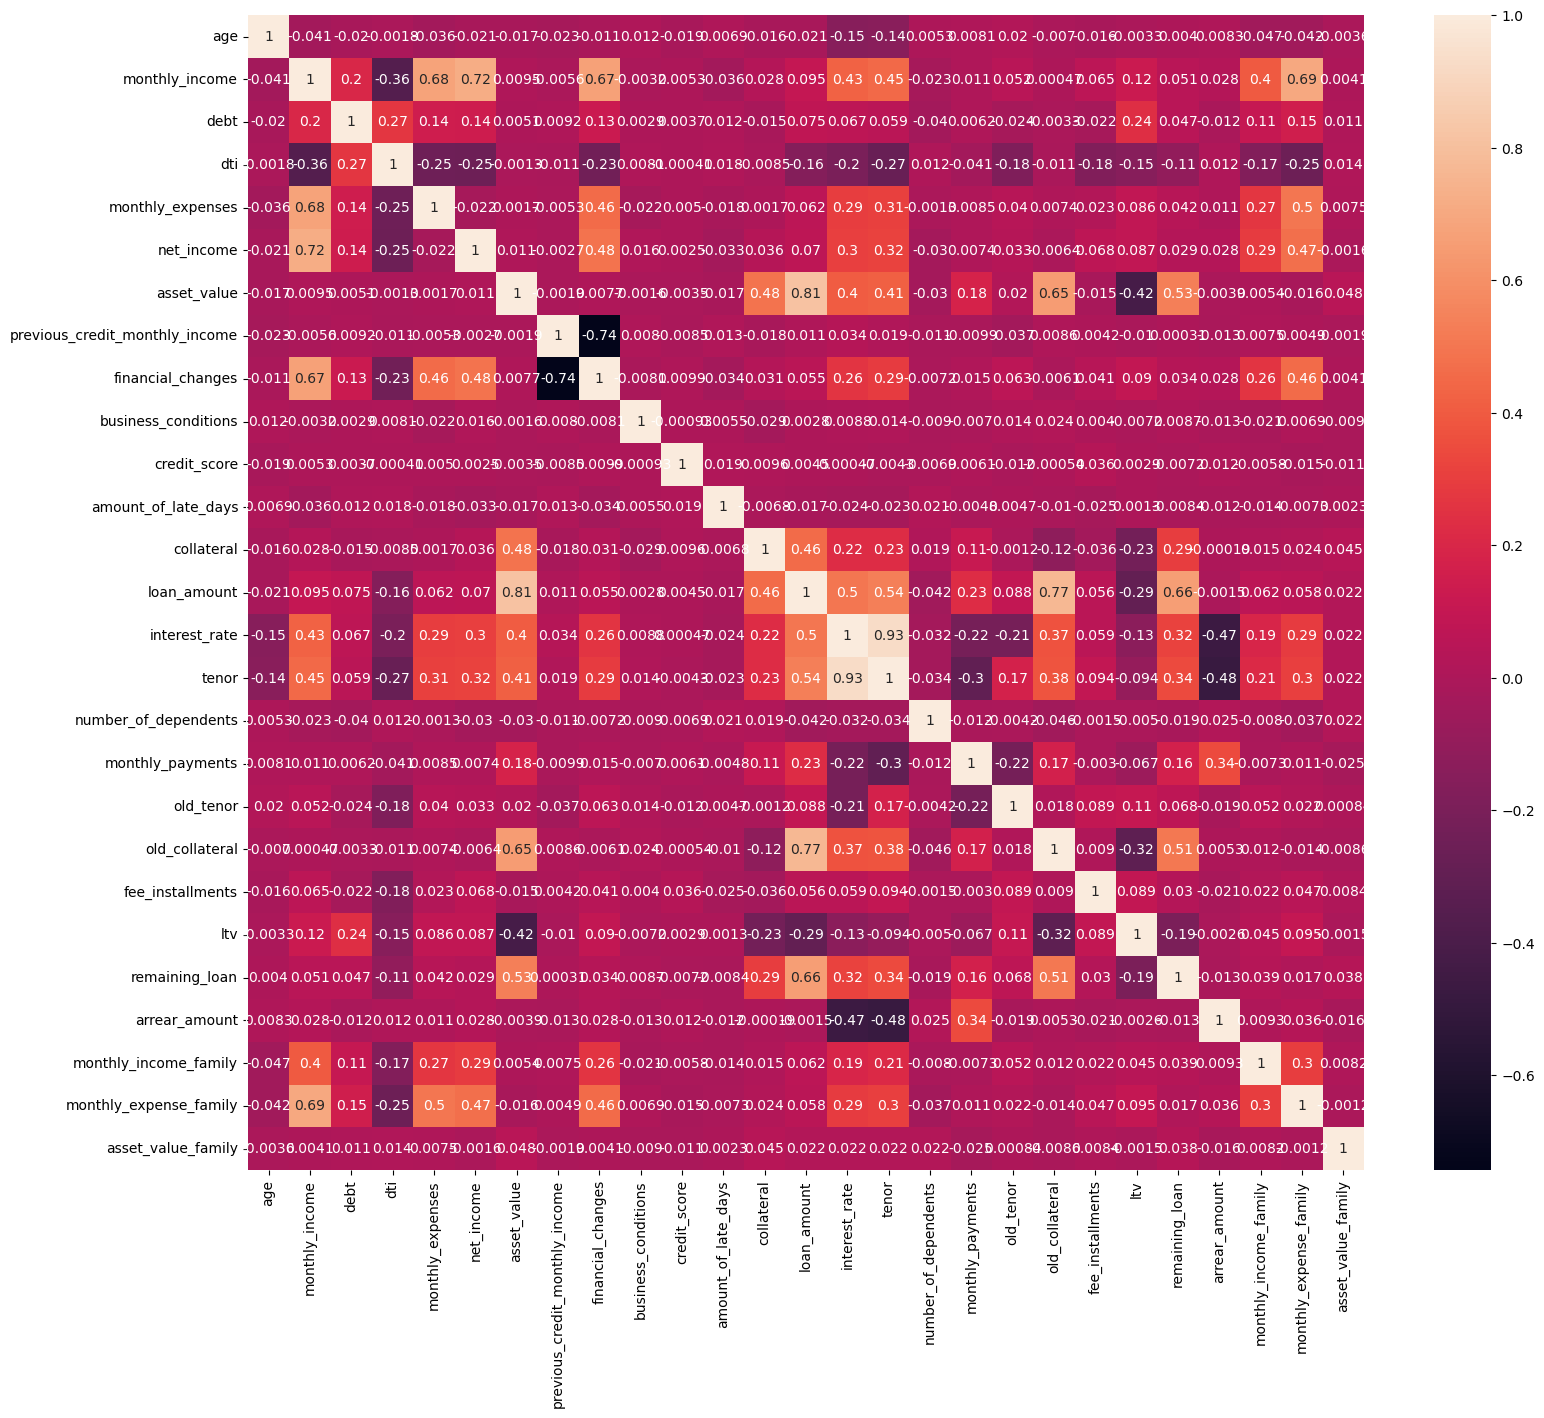

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(),annot=True)

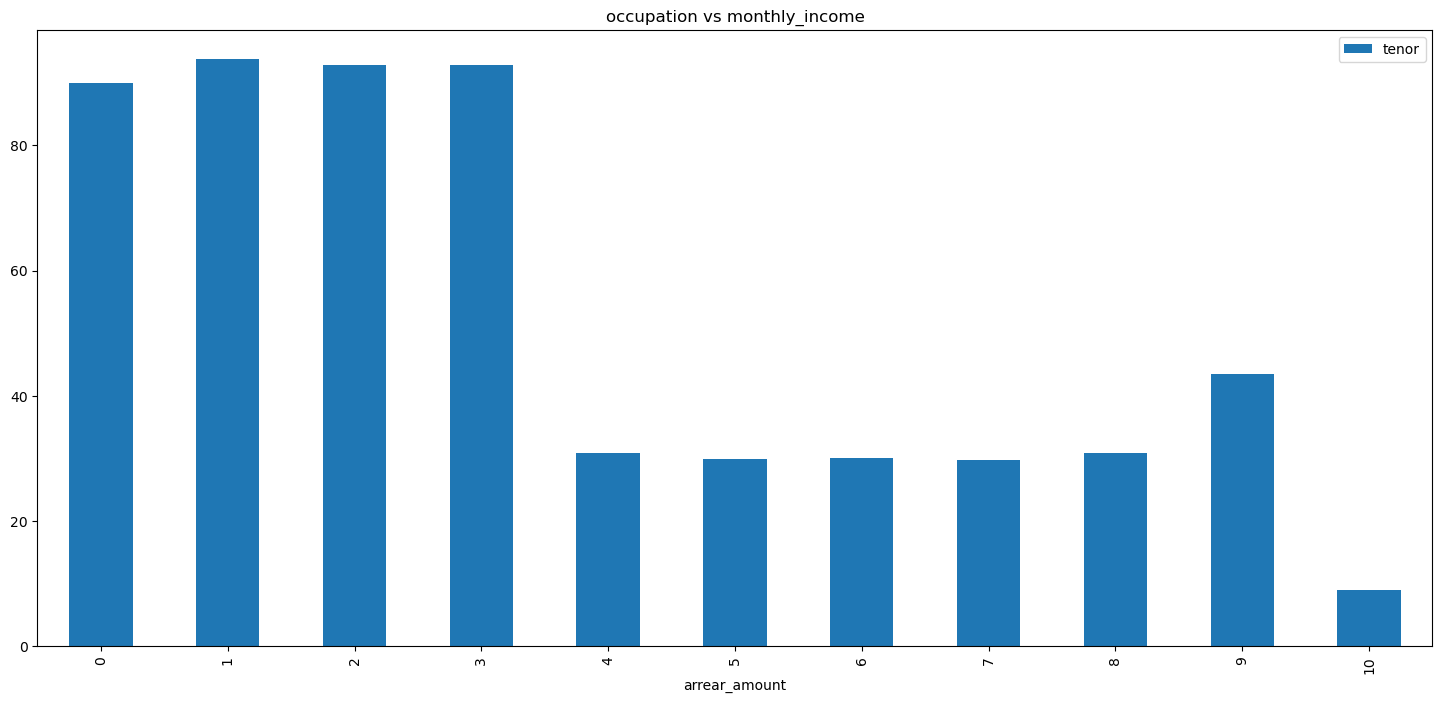

In [42]:
f, ax = plt.subplots(figsize=(18, 8))

# Bar plot for mean monthly income based on type of job
df[['arrear_amount', 'tenor']].groupby(['arrear_amount']).mean().plot.bar(ax=ax)
ax.set_title('occupation vs monthly_income')

plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3777 entries, 0 to 3776
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   debtor_id                       3777 non-null   object 
 1   age                             3777 non-null   int64  
 2   occupation                      3777 non-null   object 
 3   monthly_income                  3777 non-null   int64  
 4   debt                            3777 non-null   float64
 5   dti                             3777 non-null   float64
 6   monthly_expenses                3777 non-null   int64  
 7   net_income                      3777 non-null   int64  
 8   asset_value                     3777 non-null   int64  
 9   previous_credit_monthly_income  3777 non-null   int64  
 10  financial_changes               3777 non-null   int64  
 11  business_conditions             3777 non-null   int64  
 12  credit_score                    37

In [49]:
idx_id = df.shape[0]
df_profil = pd.read_csv('df_prof.csv')
df_profil = df_profil[:idx_id]
df_profil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3777 entries, 0 to 3776
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   debtor_name     3777 non-null   object 
 1   debtor_nik      3777 non-null   float64
 2   debtor_address  3777 non-null   object 
 3   debtor_number   3777 non-null   object 
 4   debtor_company  3777 non-null   object 
dtypes: float64(1), object(4)
memory usage: 147.7+ KB


In [52]:
# Menggabungkan kolom dari kedua DataFrame
df_gabung = pd.concat([df_profil, df], axis=1)
df_gabung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3777 entries, 0 to 3776
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   debtor_name                     3777 non-null   object 
 1   debtor_nik                      3777 non-null   float64
 2   debtor_address                  3777 non-null   object 
 3   debtor_number                   3777 non-null   object 
 4   debtor_company                  3777 non-null   object 
 5   debtor_id                       3777 non-null   object 
 6   age                             3777 non-null   int64  
 7   occupation                      3777 non-null   object 
 8   monthly_income                  3777 non-null   int64  
 9   debt                            3777 non-null   float64
 10  dti                             3777 non-null   float64
 11  monthly_expenses                3777 non-null   int64  
 12  net_income                      37

In [ ]:
# Save DataFrame to file CSV
df_gabung.to_csv('Dummy Data AI Restructure Approval rev7.csv', index=False)